# Trabalho 01

In [ ]:
!pip install matplotlib

In [ ]:
!pip install mplcursors

In [15]:
from math import sin, cos, sqrt, pi
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import random

In [10]:
class GeneticAlgorithm:
    def __init__(self, size, n_generations, n_childrens, mutation, fitness, interval, for_max=True):
        self.size = size
        self.n_generations = n_generations
        self.n_childrens = n_childrens
        self.mutation = mutation
        self.fitness = fitness
        self.interval = interval
        self.for_max = for_max

        self.population = self.init_population()
        self.childrens = []
        self.fitness_avgs = []
        self.fitness_max = []
        self.fitness_min = []

    def evaluate(self, x, y):
        return self.fitness(x, y)

    def init_population(self):
        population = []
        for i in range(self.size):
            x = random.randint(self.interval[0], self.interval[1])
            y = random.randint(self.interval[0], self.interval[1])
            fitness = self.evaluate(x, y)
            individual = [x, y, fitness]
            population.append(individual)

        return population

    def select_father(self):
        max = len(self.population) - 1
        pos_candidate1 = random.randint(0, max)
        pos_candidate2 = random.randint(0, max)

        pos_father = 0
        
        if(self.population[pos_candidate1][2] > self.population[pos_candidate2][2]):
            pos_father = pos_candidate1
        else:
            pos_father = pos_candidate2              

        return pos_father

    def intersection(self, pos_father1, pos_father2):
        x_c1 = self.population[pos_father1][0]
        x_c2 = self.population[pos_father2][0]
        y_c1 = self.population[pos_father2][1]
        y_c2 = self.population[pos_father1][1]

        fitness_c1 = self.evaluate(x_c1, y_c1)
        fitness_c2 = self.evaluate(x_c2, y_c2)

        return [x_c1, y_c1, fitness_c1], [x_c2, y_c2, fitness_c2]
    
    def mutate(self, children):
        x = random.randint(0, 100)
        y = random.randint(0, 100)

        if(x <= self.mutation):
            children[0] = random.randint(self.interval[0], self.interval[1])
        
        if(y <= self.mutation):
            children[1] = random.randint(self.interval[0], self.interval[1])

        return children
    
    def discard(self):
        ind = 1
        for_max = not self.for_max

        while ind <= self.n_childrens:
            index = self.tournament_selection(2, for_max)
            self.population.pop(index)
            ind +=1

    def min_discard(self, individuals):
        self.population = sorted(individuals, key=lambda x:x[2], reverse=True)
        self.discard()
            
    def max_discard(self, individuals):
        self.population = sorted(individuals, key=lambda x:x[2]) 
        self.discard()

    def tournament_selection(self, n, for_max=True):
        # Seleciona n índices aleatoriamente
        candidate_index = random.sample(range(len(self.population)), n)
        #print(candidates)

        candidates = [(i, self.population[i]) for i in candidate_index]
        
        if(for_max):
            best_index, _ = max(candidates, key=lambda x: x[1][2])
        else:
            best_index, _ = min(candidates, key=lambda x: x[1][2])

        return best_index
        
    def roulette_selection(self):
        sum_fitness = sum(individual[2] for individual in self.population)

        select = random.uniform(0, sum_fitness)

        current = 0

        for individual in self.population:
            current += individual[2]

            if current >= select:
                return individual

    def generate(self):
        n = 1

        while n <= self.n_childrens/2:
            pos_father1 = self.tournament_selection(2, for_max=False)
            pos_father2 = self.tournament_selection(2, for_max=False)

            children1, children2 = self.intersection(pos_father1, pos_father2)

            children1 = self.mutate(children1)
            children2 = self.mutate(children2)

            self.childrens.append(children1)
            self.childrens.append(children2)

            n += 1

    def check_individual_best(self):
        pos_best = len(self.population) - 1
        avg = self.avg_fitness()
        max_fit = max(self.population, key=lambda x:x[2])[2]
        min_fit = min(self.population, key=lambda x:x[2])[2]
        
        print(f'TAMANHO POPULAÇÃO {len(self.population)}')
        print(self.population)
        print('O melhor individuo: ')
        print('x = ', self.population[pos_best][0])
        print('y = ', self.population[pos_best][1])
        print('fitness = ', self.population[pos_best][2])
        print('maior fitness = ', max_fit)
        print('menor fitness = ', min_fit)
        print(f'média fitness = {avg}\n')

        self.fitness_avgs.append(avg)
        self.fitness_max.append(max_fit)
        self.fitness_min.append(min_fit)

    def avg_fitness(self):
        sum_fitness = sum(individual[2] for individual in self.population)

        return sum_fitness / len(self.population)

    def init(self):
        all_populations = []
        
        count_generations = 1

        while count_generations <= self.n_generations:
            print(f'Geração {count_generations}º:')
            self.childrens = []
            self.generate()
            self.population = self.population + self.childrens
            
            if(self.for_max):
                self.max_discard(self.population)
            else:
                self.min_discard(self.population)

            self.check_individual_best()
            all_populations.append(self.population)
            count_generations += 1

        return all_populations
    

In [11]:
def plot_fitness(all_populations):
    figure = plt.figure()
    ax = figure.add_subplot(111, projection='3d')
    
    for population in all_populations:
        x_coordinate = [individual[0] for individual in population]
        y_coordinate = [individual[1] for individual in population]
        costs = [individual[2] for individual in population]
        ax.scatter(x_coordinate, y_coordinate, costs, color='red')

    best = min(min(all_populations, key=lambda x: min(x, key=lambda y: y[2])), key=lambda x: x[2])
    ax.scatter(best[0], best[1], best[2], color='green', s=100, label='O melhor indíviduo')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Custo')
    ax.set_title('Superfície da função custo')

    plt.legend()
    plt.show()

## 1ª Versão:

<p>a) Proponha e justifique uma codificação, tamanho da população e fitness. Plote a superfície em 3D da função custo e mostre os pontos de ótimo encontrados na melhor simulação.</p>

$$
\text{minimizar } z = 837,9658 -
\sum_{i=1}^2 i \cdot
\sin(\sqrt{i})
$$

In [12]:
fitness_v1 = lambda x1, x2: 837.9658 - calc_xi(x1) - calc_xi(x2) 

def calc_xi(x):
    return (x * sin(sqrt(modulo(x))))

def modulo(x):
    if(x<0):
        return -1 * x
    else:
        return x

Geração 1º:
TAMANHO POPULAÇÃO 20
[[302, 301, 1438.725800839078], [-398, -63, 1255.5168585475037], [-60, -481, 926.1881904353654], [-47, -9, 864.6962172578251], [344, 370, 801.145745624937], [5, 242, 797.481851857841], [168, -152, 737.5329734602172], [212, -364, 727.3659731509208], [-159, -335, 670.7103795702134], [-156, -498, 667.1580580397671], [-156, 211, 630.8007763305487], [-260, -498, 573.862341169007], [-343, 211, 531.7851070758848], [5, 394, 502.5186048870818], [171, -320, 492.1118960253017], [-260, -320, 470.440307486646], [-263, -314, 425.8134020866276], [-230, 394, 424.7539913113425], [171, 405, 367.0212373343759], [-343, 405, 339.6296964118163]]
O melhor individuo: 
x =  -343
y =  405
fitness =  339.6296964118163
maior fitness =  1438.725800839078
menor fitness =  339.6296964118163
média fitness = 682.262970445115

Geração 2º:
TAMANHO POPULAÇÃO 20
[[-398, -63, 1255.5168585475037], [344, 370, 801.145745624937], [-230, -498, 797.7483499008135], [5, 242, 797.481851857841], [-15

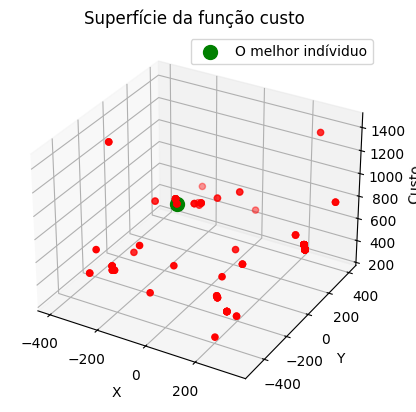

In [19]:
algorithm = GeneticAlgorithm(size=20, n_childrens=14, n_generations=10, mutation=1, interval=[-500, 500], fitness=fitness_v1, for_max=False)

all_populations = algorithm.init()

plot_fitness(all_populations)

## 2ª Versão

$$
\text{minimizar } z = 20 + x^2 + y^2 - 10 \cdot (\cos(2\pi x) + \cos(2\pi y))
$$

In [16]:
fitness_v2 = lambda x, y: 20 + (x**2) + (y**2) - 10 * (cos(2*pi*x) + cos(2*pi*y))

Geração 1º:
TAMANHO POPULAÇÃO 20
[[5, -5, 50.0], [-5, -4, 41.0], [5, 2, 29.0], [4, 2, 20.0], [-1, -4, 17.0], [-1, -4, 17.0], [-4, 0, 16.0], [-2, 3, 13.0], [3, 1, 10.0], [2, 2, 8.0], [-2, 2, 8.0], [-2, 2, 8.0], [-2, 1, 5.0], [0, 2, 4.0], [1, -1, 2.0], [1, -1, 2.0], [1, 1, 2.0], [1, 0, 1.0], [-4, 1, 1.0], [0, -1, 1.0]]
O melhor individuo: 
x =  0
y =  -1
fitness =  1.0
maior fitness =  50.0
menor fitness =  1.0
média fitness = 12.75

Geração 2º:
TAMANHO POPULAÇÃO 20
[[5, -5, 50.0], [-4, 0, 16.0], [-2, 3, 13.0], [3, 1, 10.0], [3, -1, 10.0], [3, 0, 9.0], [2, 2, 8.0], [1, 2, 5.0], [-2, 1, 5.0], [-2, 1, 5.0], [0, 2, 4.0], [1, -1, 2.0], [1, 1, 2.0], [1, 1, 2.0], [1, 1, 2.0], [-4, 1, 1.0], [0, -1, 1.0], [1, 0, 1.0], [1, 0, 1.0], [1, 0, 1.0]]
O melhor individuo: 
x =  1
y =  0
fitness =  1.0
maior fitness =  50.0
menor fitness =  1.0
média fitness = 7.4

Geração 3º:
TAMANHO POPULAÇÃO 20
[[-4, 0, 16.0], [-2, 3, 13.0], [3, -1, 10.0], [3, 0, 9.0], [-2, 1, 5.0], [1, 2, 5.0], [1, 2, 5.0], [0, 2, 4.0

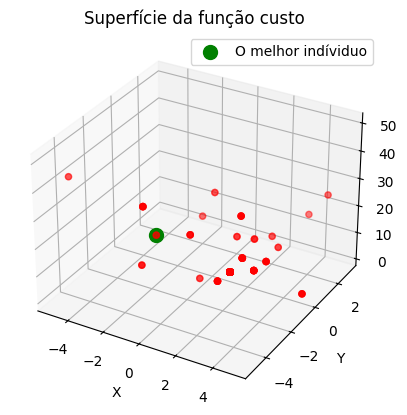

In [18]:
algorithm = GeneticAlgorithm(size=20, n_childrens=14, n_generations=10, mutation=1, interval=[-5, 5], fitness=fitness_v2, for_max=False)

all_populations = algorithm.init()

plot_fitness(all_populations)

## 3ª Versão

$$
\text{maximizar } z = x^{-(x ^ 2 + y ^ 2)}
$$

In [25]:
fitness_v3 = lambda x, y: x**(-((x**2)+(y**2))) if x != 0 and y != 0 else 0

Geração 1º:
TAMANHO POPULAÇÃO 20
[[-1, -2, -1.0], [-1, 2, -1.0], [-1, -2, -1.0], [-1, -2, -1.0], [-1, -2, -1.0], [1, 0, 0], [0, -2, 0], [-2, 0, 0], [0, -2, 0], [0, -1, 0], [2, -2, 0.00390625], [1, 1, 1.0], [-1, 1, 1.0], [1, -1, 1.0], [1, -2, 1.0], [1, -2, 1.0], [1, 1, 1.0], [1, -2, 1.0], [1, -2, 1.0], [1, -1, 1.0]]
O melhor individuo: 
x =  1
y =  -1
fitness =  1.0
maior fitness =  1.0
menor fitness =  -1.0
média fitness = 0.2001953125

Geração 2º:
TAMANHO POPULAÇÃO 20
[[-1, 2, -1.0], [0, -2, 0], [0, -2, 0], [0, -2, 0], [-1, 0, 0], [2, -2, 0.00390625], [-2, -2, 0.00390625], [2, -1, 0.03125], [1, 1, 1.0], [-1, 1, 1.0], [1, -1, 1.0], [1, -2, 1.0], [1, -2, 1.0], [1, 1, 1.0], [1, -2, 1.0], [1, -1, 1.0], [1, -2, 1.0], [-1, 1, 1.0], [-1, -1, 1.0], [1, -2, 1.0]]
O melhor individuo: 
x =  1
y =  -2
fitness =  1.0
maior fitness =  1.0
menor fitness =  -1.0
média fitness = 0.551953125

Geração 3º:
TAMANHO POPULAÇÃO 20
[[-1, 2, -1.0], [-1, -2, -1.0], [0, -2, 0], [-1, 0, 0], [0, -2, 0], [0, -2, 0]

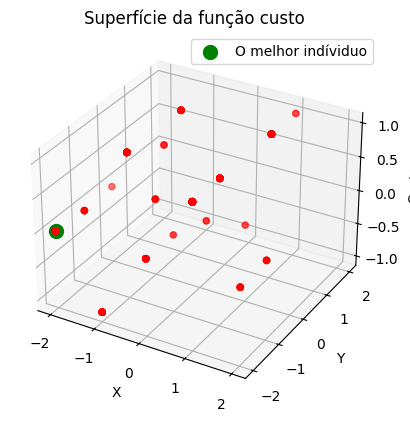

In [26]:
algorithm = GeneticAlgorithm(size=20, n_childrens=14, n_generations=10, mutation=1, interval=[-2, 2], fitness=fitness_v3, for_max=True)

all_populations = algorithm.init()

plot_fitness(all_populations)